<a href="https://colab.research.google.com/github/david125-cmd/python-data-science-challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



Primero importamos los datos que estan almacenados externamente en formato csv

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

tienda_2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [ ]:
#Sumamos las venta por cada tienda , las nombrearemos segun el snake_case
ingresos_tienda_1 = tienda_1['Precio'].sum()
ingresos_tienda_2 = tienda_2['Precio'].sum()
ingresos_tienda_3 = tienda_3['Precio'].sum()
ingresos_tienda_4 = tienda_4['Precio'].sum()

In [ ]:
#Imprimimos el total de ventas por tienda hasta el momento
print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingresos_tienda_1:,.2f}")
print(f"Tienda 2: ${ingresos_tienda_2:,.2f}")
print(f"Tienda 3: ${ingresos_tienda_3:,.2f}")
print(f"Tienda 4: ${ingresos_tienda_4:,.2f}")

Ingresos totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


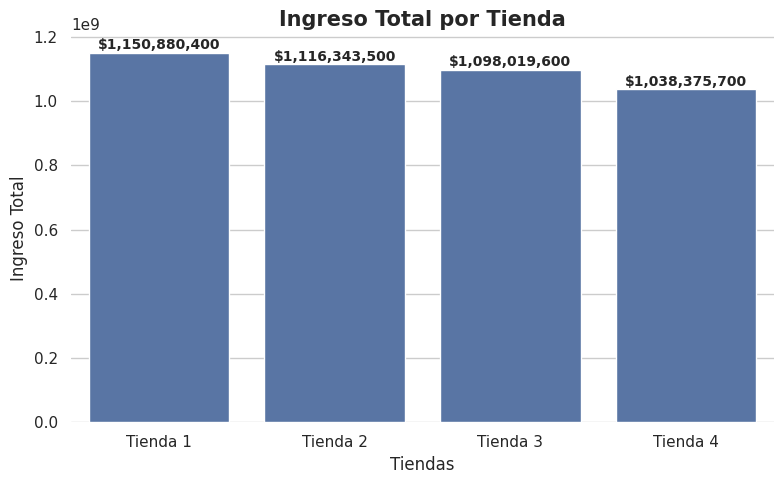

In [ ]:
#Graficamos las ventas totales para una mejor visualización.

sns.set_theme(style="whitegrid")
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_por_tienda = [ingresos_tienda_1, ingresos_tienda_2, ingresos_tienda_3, ingresos_tienda_4]

#tamaño de la grafica
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=tiendas, y=ingresos_por_tienda)

#etiquetas a cada barra
for i, valor in enumerate(ingresos_por_tienda):
    barplot.text(i, valor + max(ingresos_por_tienda)*0.001, f"${valor:,.0f}",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Título y etiquetas
plt.title('Ingreso Total por Tienda', fontsize=15, fontweight='bold')
plt.ylabel('Ingreso Total', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [ ]:
#Revisamos las ventas por año de cada una de las tiendas para visualizar la evaluacion del desempeño de las tiendas


for df in [tienda_1, tienda_2, tienda_3, tienda_4]:
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce', format="%d/%m/%Y")
    df['Año'] = df['Fecha de Compra'].dt.year

ventas_por_anio = {
    'Tienda 1': tienda_1.groupby('Año')['Precio'].sum(),
    'Tienda 2': tienda_2.groupby('Año')['Precio'].sum(),
    'Tienda 3': tienda_3.groupby('Año')['Precio'].sum(),
    'Tienda 4': tienda_4.groupby('Año')['Precio'].sum()
}

df_ventas_anuales = pd.DataFrame(ventas_por_anio)

print("Ventas totales por tienda y año:\n")
print(df_ventas_anuales)

print("\nTienda que más vendió por año:\n")
print(df_ventas_anuales.idxmax(axis=1))

print("\nTienda que menos vendió por año:\n")
print(df_ventas_anuales.idxmin(axis=1))

Ventas totales por tienda y año:

         Tienda 1     Tienda 2     Tienda 3     Tienda 4
Año                                                     
2020  368933200.0  131441000.0  321707500.0  112464600.0
2021  362120800.0  115219300.0  362954400.0  120668900.0
2022  316565600.0  143767200.0  350438300.0  110838000.0
2023  103260800.0   39622200.0   62919400.0   24743600.0

Tienda que más vendió por año:

Año
2020    Tienda 1
2021    Tienda 3
2022    Tienda 3
2023    Tienda 1
dtype: object

Tienda que menos vendió por año:

Año
2020    Tienda 4
2021    Tienda 2
2022    Tienda 4
2023    Tienda 4
dtype: object


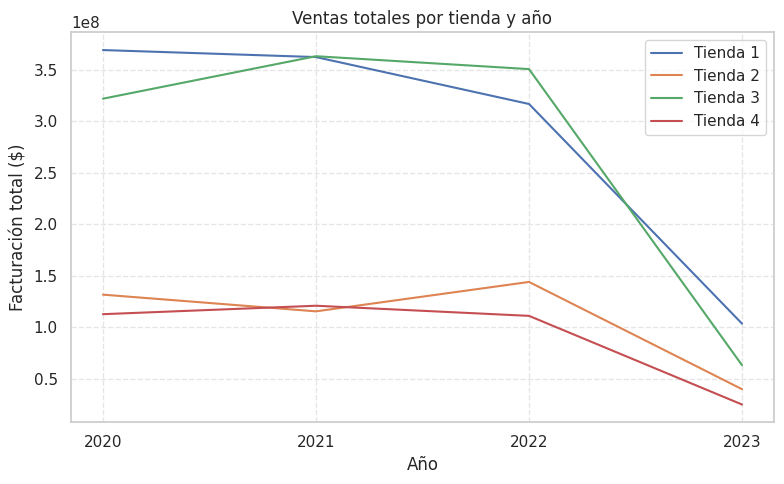

In [ ]:
plt.figure(figsize=(8,5))

for tienda in df_ventas_anuales.columns:
    plt.plot(df_ventas_anuales.index, df_ventas_anuales[tienda], label=tienda)

plt.title("Ventas totales por tienda y año")
plt.xlabel("Año")
plt.ylabel("Facturación total ($)")
plt.xticks(df_ventas_anuales.index.astype(int))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

In [ ]:
df_union = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

In [ ]:
# Verificamos las venta por cada metodo de pago
metodos_pago = df_union.groupby(['Tienda', 'Método de pago']).size().reset_index(name='Cantidad')

totales_tienda = df_union['Tienda'].value_counts().reset_index()
totales_tienda.columns = ['Tienda', 'Total Ventas']

metodos_pago = metodos_pago.merge(totales_tienda, on='Tienda')
metodos_pago['Porcentaje'] = (metodos_pago['Cantidad'] / metodos_pago['Total Ventas']) * 100

metodos_pago['Porcentaje'] = metodos_pago['Porcentaje'].round(2)


print("Distribución de métodos de pago por tienda:\n")
print(metodos_pago)

Distribución de métodos de pago por tienda:

      Tienda      Método de pago  Cantidad  Total Ventas  Porcentaje
0   Tienda 1               Cupón       137          2359        5.81
1   Tienda 1               Nequi       483          2359       20.47
2   Tienda 1  Tarjeta de crédito      1704          2359       72.23
3   Tienda 1   Tarjeta de débito        35          2359        1.48
4   Tienda 2               Cupón       141          2359        5.98
5   Tienda 2               Nequi       467          2359       19.80
6   Tienda 2  Tarjeta de crédito      1721          2359       72.95
7   Tienda 2   Tarjeta de débito        30          2359        1.27
8   Tienda 3               Cupón       101          2359        4.28
9   Tienda 3               Nequi       468          2359       19.84
10  Tienda 3  Tarjeta de crédito      1753          2359       74.31
11  Tienda 3   Tarjeta de débito        37          2359        1.57
12  Tienda 4               Cupón       125          2358  

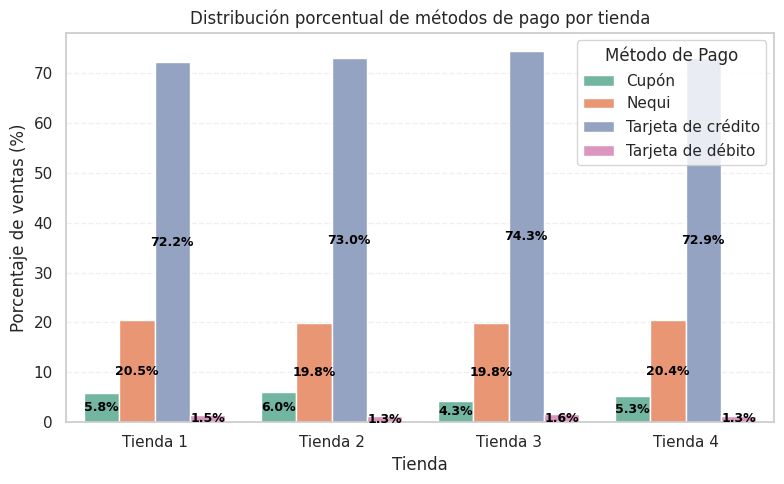

In [ ]:
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=metodos_pago,
    x='Tienda',
    y='Porcentaje',
    hue='Método de pago',
    palette='Set2'
)


plt.title('Distribución porcentual de métodos de pago por tienda')
plt.ylabel('Porcentaje de ventas (%)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Método de Pago')

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            weight='bold'
        )

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda